In [1]:
import pandas as pd



# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

data1 = pd.read_csv('../data/appartements1.csv')
data2 = pd.read_csv('../data/appartements2.csv')
appartements=pd.concat([data1,data2],axis=0,ignore_index=True)
df =appartements.copy()



In [2]:
df.head()


,surface(m²),pieces,chambres,salles de bains,etat,etage,ans,ville,autre,prix(DHs),lienImage,lienArticle
0,80 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,Riad Al Atlas à Marrakech,Terrasse Piscine Cuisine équipée,1020000 DH,https://www.mubawab-media.com/ad/7/662/711F/h/...,https://www.mubawab.ma/fr/pa/7662711/vend-appa...
1,124 m²,4 Pièces,3 Chambres,2 Salles de bains,Nouveau,NaN,NaN,Centre à Tanger,Terrasse Garage Ascenseur Concierge Climatisat...,NaN,https://www.mubawab-media.com/ad/7/666/198F/h/...,https://www.mubawab.ma/fr/pa/7666198/superbe-a...
2,60 m²,3 Pièces,2 Chambres,NaN,Nouveau,NaN,NaN,Route Nationale Assilah (N1) à Tanger,Piscine Cuisine équipée,400000 DH,https://www.mubawab-media.com/ad/7/662/740F/h/...,https://www.mubawab.ma/fr/pa/7662740/apparteme...
3,112 m²,NaN,3 Chambres,2 Salles de bains,NaN,NaN,NaN,Moujahidine à Tanger,Terrasse Ascenseur Climatisation Sécurité Cuis...,NaN,https://www.mubawab-media.com/ad/7/599/050F/h/...,https://www.mubawab.ma/fr/pa/7599050/vente-d-u...
4,76 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,Guéliz à Marrakech,Terrasse Garage Ascenseur Piscine Climatisatio...,988000 DH,https://www.mubawab-media.com/ad/7/661/782F/h/...,https://www.mubawab.ma/fr/pa/7661782/apparteme...


In [3]:
from sklearn.model_selection import train_test_split
from preprocessing import Preprocessing 
p =Preprocessing()
X,y,vectorize =p.processing(df)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

c:\Users\us\Desktop\MachineLearningProject\Implementation\processing\preprocessing.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['etat'] =df['etat'].str.lower().str.replace(' ','')
c:\Users\us\Desktop\MachineLearningProject\Implementation\processing\preprocessing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['autre'] =df['autre'].str.lower()
c:\Users\us\Desktop\MachineLearningProject\Implementation\processing\preprocessing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a 

In [4]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

import numpy as np

Models =[]
train_scores=[]
validation_scores=[]


def evaluation(model):
    
 
    
    N,train_score, val_score= learning_curve(model,
                                                X_train,
                                                y_train,
                                                random_state=0,
                                              train_sizes= np.linspace(.1,1,10),
                                              scoring='r2',
                                                cv= 5
                                             )
    train_scores.append(train_score.mean(axis=1).mean())
    validation_scores.append(val_score.mean(axis=1).mean())
    plt.plot(N,train_score.mean(axis=1),label='Train_score')
    plt.plot(N,val_score.mean(axis=1),label='val_score')
    plt.legend()
    plt.show()




DescisionTree


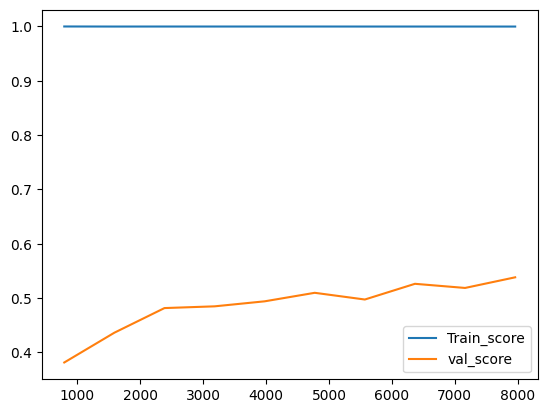

ElasticNet


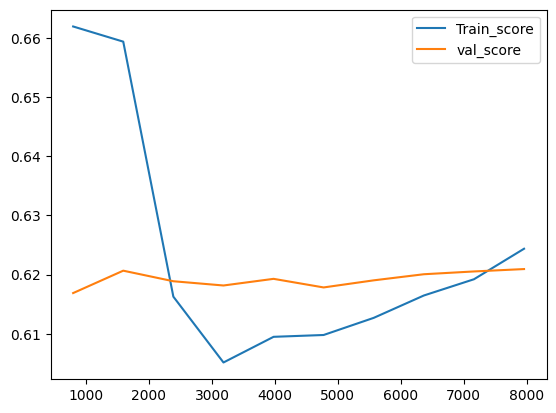

Dummy


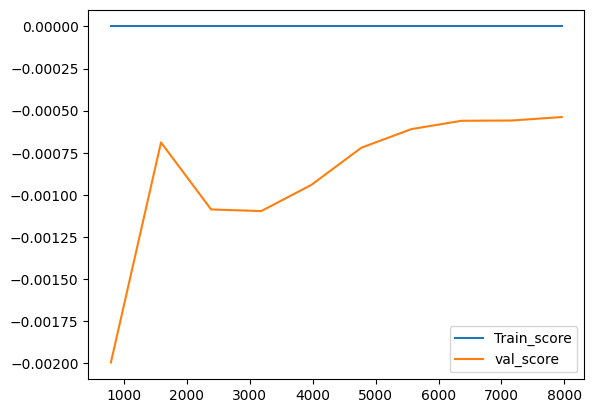

SVR


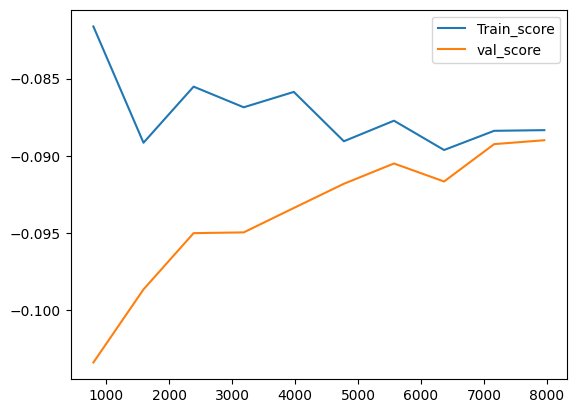

Ridge


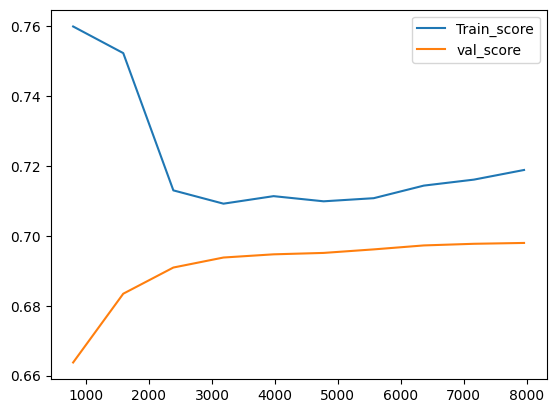

KNN


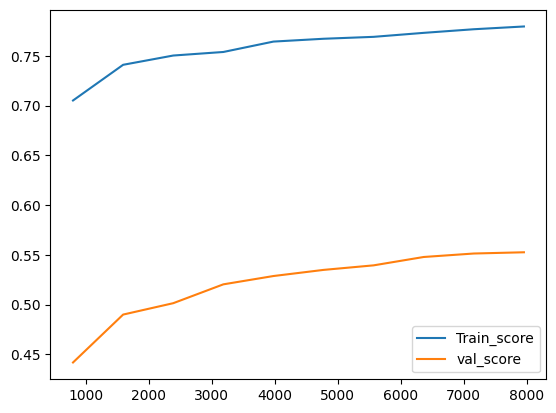

Lasso


C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+13, tolerance: 3.560e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.586e+13, tolerance: 7.660e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

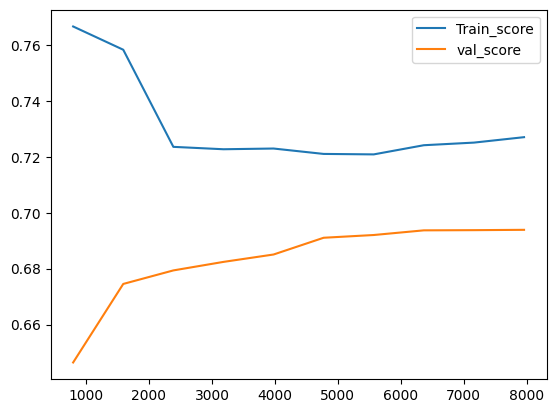

LinearRegression


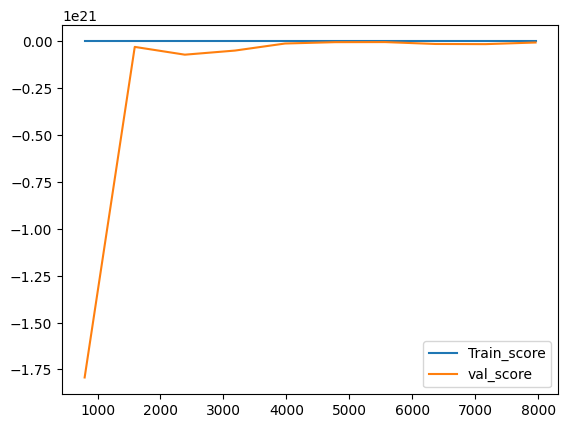

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet


svrPipline =make_pipeline(RobustScaler(),SVR())
LassoPipline =make_pipeline(RobustScaler(),Lasso(alpha=.7))
RidgePipline =make_pipeline(RobustScaler(),Ridge(alpha=.7))
LinearRegressionPipline =make_pipeline(RobustScaler(),LinearRegression())
KNNPipline =make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors=3))
DummyRegressoripline =make_pipeline(RobustScaler(),DummyRegressor())
Elastic_Netpipline =make_pipeline(RobustScaler(),ElasticNet(alpha=0.1, l1_ratio=0.5))
DescisionTreepipline=make_pipeline(RobustScaler(),DecisionTreeRegressor())



models={'DescisionTree':DescisionTreepipline,'ElasticNet':Elastic_Netpipline,'Dummy':DummyRegressoripline,'SVR':svrPipline, 'Ridge':RidgePipline,'KNN':KNNPipline,'Lasso':LassoPipline,'LinearRegression':LinearRegressionPipline}
for name ,model in models.items():
    print(name)
    Models.append(name)
    plt.figure()
    evaluation(model)

scores_dict={
    'Models':Models,
'validation_score':validation_scores,
'train_score':train_scores
} 



grdBoosting


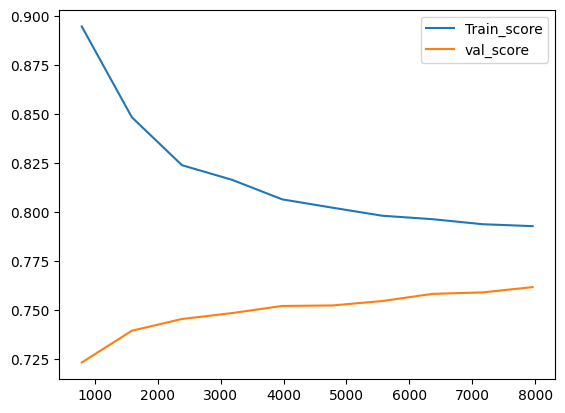

xgboost


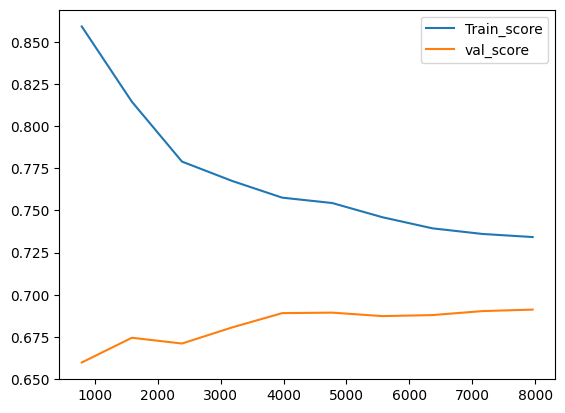

randomForest


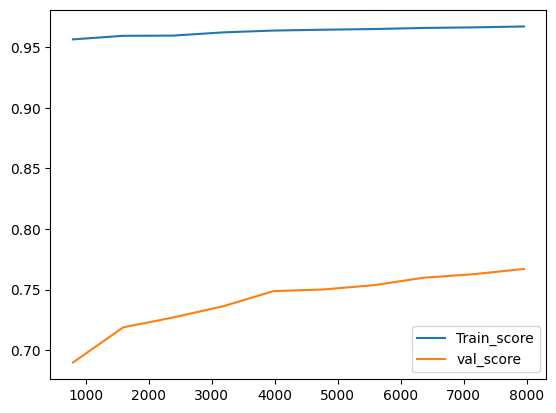

,Models,validation_score,train_score
0,DescisionTree,4.868770e-01,0.999901
1,ElasticNet,6.192148e-01,0.623465
2,Dummy,-8.792765e-04,0.000000
3,SVR,-9.374886e-02,-0.087209
4,Ridge,6.910610e-01,0.721520
5,KNN,5.208807e-01,0.758040
6,Lasso,6.832222e-01,0.731214
7,LinearRegression,-1.991609e+20,0.731214
8,grdBoosting,7.495991e-01,0.817388
9,xgboost,6.821109e-01,0.768740


In [6]:
from sklearn.preprocessing import RobustScaler,PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

xgboostpipline = make_pipeline(RobustScaler(),XGBRFRegressor())
randomForestRegressor =make_pipeline(RobustScaler(),RandomForestRegressor(random_state=0))
gradientBoostingRegressor =make_pipeline(RobustScaler(),GradientBoostingRegressor())


ensemble_models ={'grdBoosting':gradientBoostingRegressor,'xgboost':xgboostpipline,'randomForest':randomForestRegressor}
for name ,model in ensemble_models.items():
    print(name)
    Models.append(name)
    plt.figure()
    evaluation(model)

scores_dict={
    'Models':Models,
    'validation_score':validation_scores,
    'train_score':train_scores
}
pd.DataFrame(scores_dict)
